In [3]:
import re, string 
import pandas as pd   
from collections import defaultdict
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import matplotlib
%matplotlib inline

In [4]:
df = pd.read_csv('bbc-text.csv',delimiter=',', encoding= 'unicode_escape')


In [5]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [6]:
from nltk.stem import WordNetLemmatizer
ts= WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
def clean_text(raw):
    raw = raw.lower()
    raw = re.sub(r'\[.*?\]', '', raw)
    raw = re.sub(r'[%s]' % re.escape(string.punctuation), '', raw)
    raw = re.sub(r'\w*\d\w*', '', raw)
    #raw = [ts.lemmatize(x) for x in raw if x not in set(stopwords.words('english'))]
    #raw = ' '.join(raw)
    return raw

In [10]:
df.text = df.text.apply(clean_text)

In [11]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [12]:
# min_count: minimum number of occurrences of a word in the corpus to be included in the model.
# window: the maximum distance between the current and predicted word within a sentence.
# size: the dimensionality of the feature vectors
# workers: I know my system is having 4 cores, 
w2v_model = Word2Vec(min_count=200,
                     window=5,
                     size=100,
                     workers=4)

In [13]:
sentences = [row.split() for row in df['text']]
# this line of code to prepare the model vocabulary
w2v_model.build_vocab(sentences)

In [14]:
# train word vectors
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_model.iter)

C:\Users\vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  


(1614874, 4237120)

In [15]:
w2v_model.corpus_count

2225

In [17]:
# Explore the model
w2v_model.wv.most_similar(positive=['economy'])

[('economic', 0.9612232446670532),
 ('growth', 0.8966206312179565),
 ('interest', 0.8819047212600708),
 ('oil', 0.8537181615829468),
 ('rate', 0.8216956257820129),
 ('rise', 0.8186893463134766),
 ('strong', 0.8087546825408936),
 ('consumer', 0.8077279329299927),
 ('price', 0.7978795766830444),
 ('demand', 0.7970385551452637)]

In [18]:
# how similar are these two words to each other 
w2v_model.wv.similarity('company', 'business')

0.7820221

In [19]:
def tsne_plot(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
C:\Users\vivek\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\vivek\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 156 missing from current font.
  font.load_char(ord(s), flags=flags)


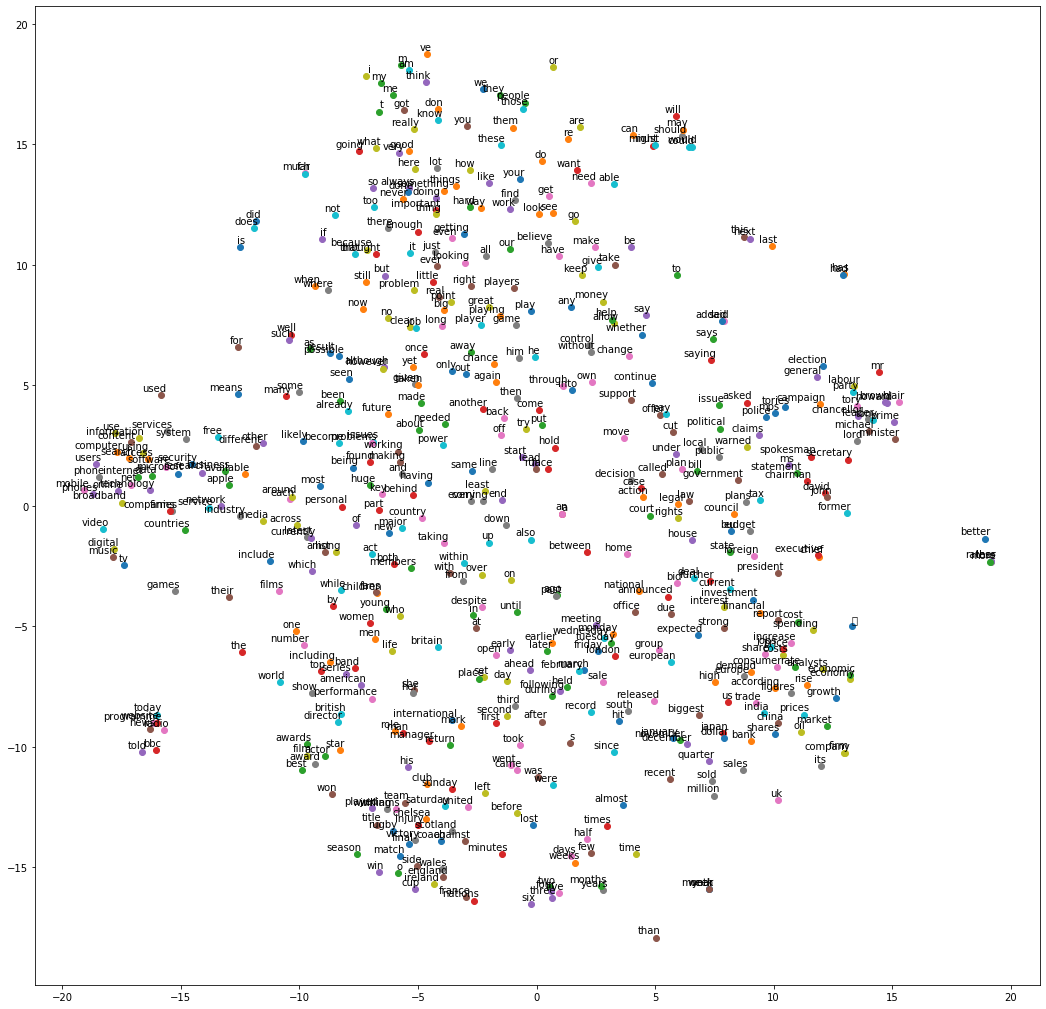

In [20]:
# Use t-SNE to represent high-dimensional data 
# and the underlying relationships between vectors in a lower-dimensional space.
tsne_plot(w2v_model)

In [ ]:
# from gensim.models import KeyedVectors

# filename = 'GoogleNews-vectors-negative300.bin.gz'
# model = KeyedVectors.load_word2vec_format(filename, binary=True)
# calculate: (king - man) + woman = ?
# result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
# print(result)